In [9]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


In [10]:
df = pd.read_csv("donnees_ventes.csv", parse_dates=["Date"], index_col="Date")
print(df.head())  # Vérifier si le fichier est bien lu

            Ventes       Prix  Promo     Saison  JourFerie
Date                                                      
2020-01-01     152  11.249760      0  50.000000          0
2020-01-02     142   8.777259      0  50.100098          0
2020-01-03      64  13.365648      1  50.200187          0
2020-01-04     156  10.874536      0  50.300255          1
2020-01-05     121   7.940447      0  50.400293          0


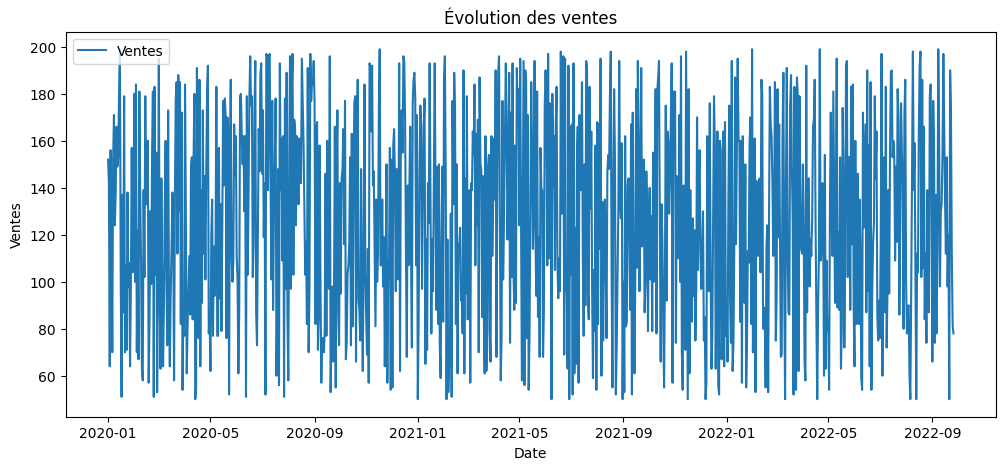

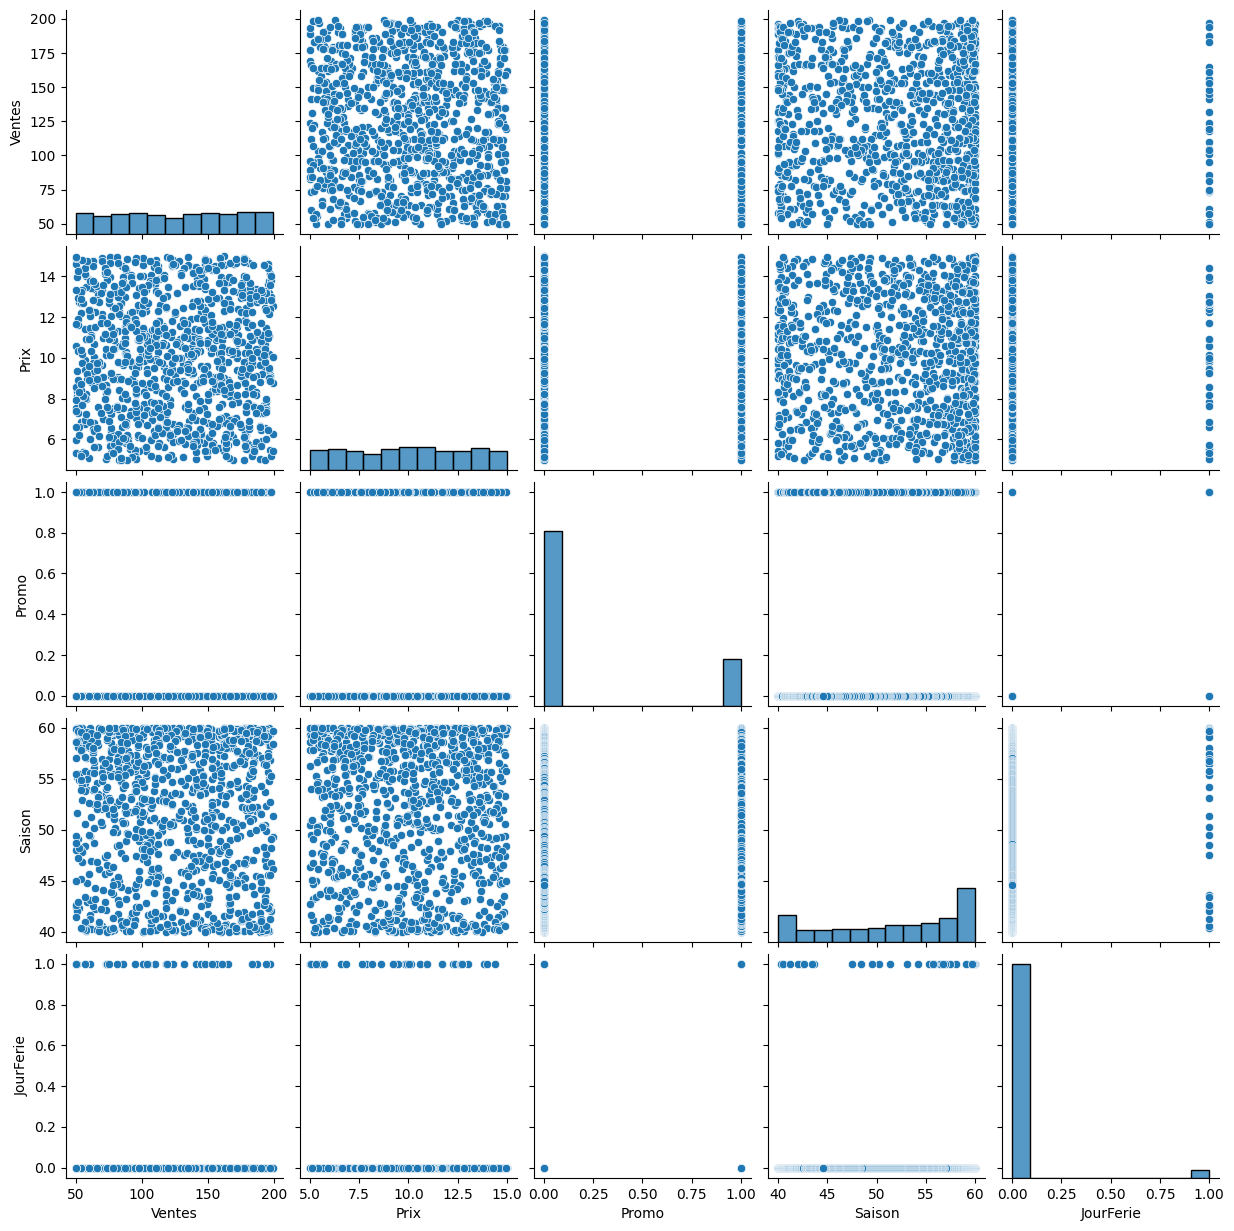

In [19]:
df = df.asfreq('D')
plt.figure(figsize=(12,5))
sns.lineplot(data= df, x=df.index, y="Ventes", label="Ventes")
plt.title("Évolution des ventes")
plt.show()

sns.pairplot(df[["Ventes", "Prix", "Promo", "Saison", "JourFerie"]])
plt.show()


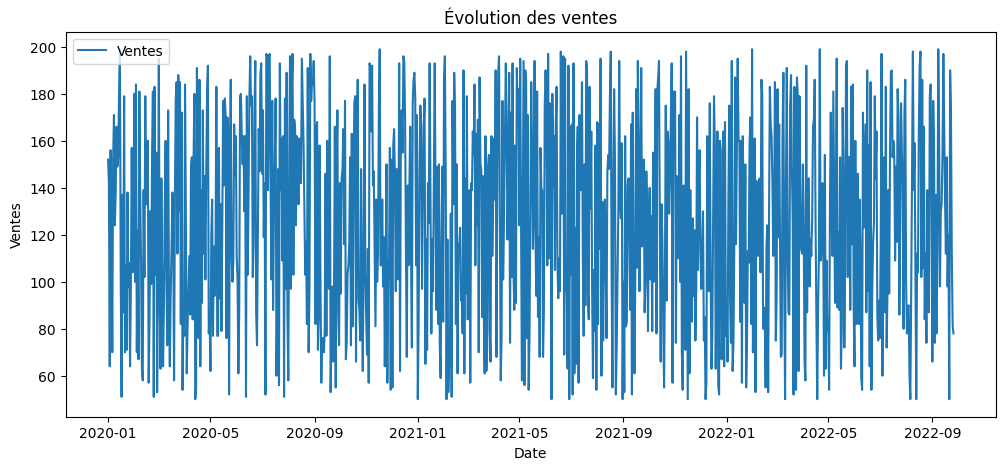

In [11]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x=df.index, y="Ventes", label="Ventes")
plt.title("Évolution des ventes")
plt.show()

In [12]:
X = df[["Prix", "Promo", "Saison", "JourFerie"]]
y = df["Ventes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Régression Linéaire - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Régression Linéaire - R²:", r2_score(y_test, y_pred_lr))

Régression Linéaire - RMSE: 45.99475551627092
Régression Linéaire - R²: -0.021137163771007383


In [14]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest - R²:", r2_score(y_test, y_pred_rf))

Random Forest - RMSE: 50.37395371121866
Random Forest - R²: -0.22484047850703903


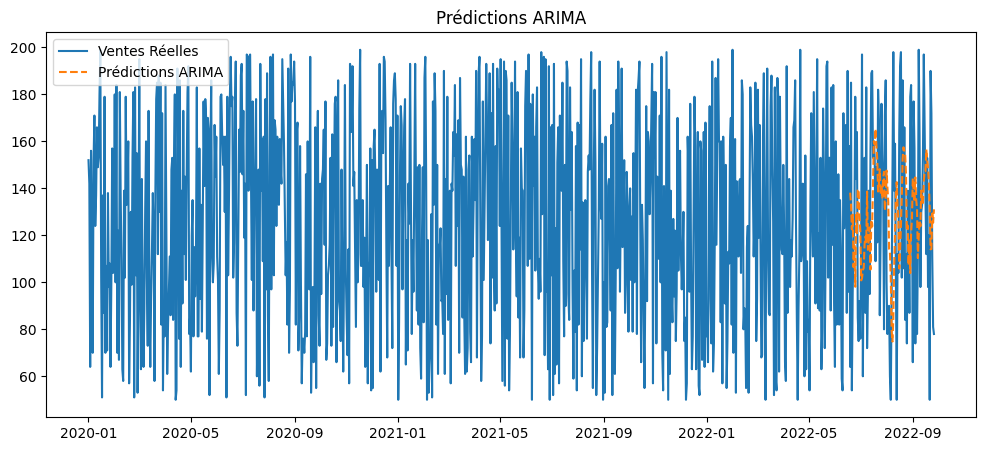

In [20]:
model = sm.tsa.ARIMA(df["Ventes"], order=(5,1,0))
model_fit = model.fit()
df["ARIMA_Pred"] = model_fit.predict(start=len(df)-100, end=len(df)-1, typ="levels")

plt.figure(figsize=(12,5))
plt.plot(df["Ventes"], label="Ventes Réelles")
plt.plot(df["ARIMA_Pred"], label="Prédictions ARIMA", linestyle="dashed")
plt.legend()
plt.title("Prédictions ARIMA")
plt.show()

In [16]:
models = {
    "Régression Linéaire": y_pred_lr,
    "Random Forest": y_pred_rf
}

for model_name, y_pred in models.items():
    print(f"{model_name} - RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

Régression Linéaire - RMSE: 45.99
Random Forest - RMSE: 50.37
